In [1]:
import requests
import json
from config import ninjas_api_key
from pprint import pprint
import pandas as pd
from scipy import stats
from scipy.stats import linregress
import numpy as np
import matplotlib.pyplot as plt

ninjas_api_key

'SHR8p3EdWYzm7dwM2JWwSA==mGeGJoqZxhFFw8o1'

In [2]:
# TESTING: API test call - One dog

name = "Small Munsterlander Pointer" #"Slovensky Kopov" #"German Shepherd Dog" #"Maltese" #"German Sheppard"

url = "https://api.api-ninjas.com/v1/dogs?name={}"
api_url = url.format(name)
response = requests.get(api_url, headers={'X-Api-Key': ninjas_api_key})

json_response = response.json()

print(json.dumps(json_response, indent = 4, sort_keys = True))


[]


In [3]:
# TESTING: Working with 3 dogs now

dogs_list = ["German Shepherd Dog", "Maltese", "Dalmatian"]

name = dogs_list[2]

dogs_list_output = []

url = "https://api.api-ninjas.com/v1/dogs?name={}"

for dog in dogs_list:
    api_url = url.format(dog)
    response = requests.get(api_url, headers={'X-Api-Key': ninjas_api_key})
    dogs = response.json()
    print(dogs[0]["name"])
    
    # parsing out json record keys 
    dog_name = dogs[0]['name']
    image_link = dogs[0]['image_link']
    barking = dogs[0]['barking']
    coat_length = dogs[0]['coat_length']
    drooling = dogs[0]['drooling']
    energy = dogs[0]['energy']
    good_with_children = dogs[0]['good_with_children']
    good_with_other_dogs = dogs[0]['good_with_other_dogs']
    good_with_strangers = dogs[0]['good_with_strangers']
    grooming = dogs[0]['grooming']
    max_height_female = dogs[0]['max_height_female']
    max_height_male = dogs[0]['max_height_male']
    max_life_expectancy = dogs[0]['max_life_expectancy']
    max_weight_female = dogs[0]['max_weight_female']
    max_weight_male = dogs[0]['max_weight_male']
    min_height_female = dogs[0]['min_height_female']
    min_height_male = dogs[0]['min_height_male']
    min_life_expectancy = dogs[0]['min_life_expectancy']
    min_weight_female = dogs[0]['min_weight_female']
    min_weight_male = dogs[0]['min_weight_male']
    playfulness = dogs[0]['playfulness']
    protectiveness = dogs[0]['protectiveness']
    shedding = dogs[0]['shedding']
    trainability = dogs[0]['trainability']
    
    # appending dog data points into list/dictionary
    
    dogs_list_output.append({"Dog Name" : dog_name,
                             "Image Link" : image_link,
                             "Barking" : barking,
                             "Coat Length" : coat_length,
                             "Drooling" : drooling, 
                             "Energy" : energy, 
                             "Good with children" : good_with_children, 
                             "Good with other dogs" : good_with_other_dogs, 
                             "Good with strangers" : good_with_strangers, 
                             "Grooming" : grooming, 
                             "Max Height Female" : max_height_female, 
                             "Max Height Male" : max_height_male, 
                             "Max Life Expectancy" : max_life_expectancy, 
                             "Max Weight Female" : max_weight_female, 
                             "Max Weight Male" : max_weight_male,
                             "Min Height Female" : min_height_female, 
                             "Min Height Male" : min_height_male, 
                             "Min Life Expectancy" : min_life_expectancy,
                             "Min Weight Female" : min_weight_female,
                             "Min Weight Male" : min_weight_male,
                             "Playfulness" : playfulness,
                             "Protectiveness" : protectiveness,
                             "Shedding" : shedding, 
                             "Trainability" : trainability})





dogs_list_output # not a dataframe



German Shepherd Dog
Maltese
Dalmatian


[{'Dog Name': 'German Shepherd Dog',
  'Image Link': 'https://api-ninjas.com/images/dogs/german_shepherd_dog.jpg',
  'Barking': 3,
  'Coat Length': 1,
  'Drooling': 2,
  'Energy': 5,
  'Good with children': 5,
  'Good with other dogs': 3,
  'Good with strangers': 3,
  'Grooming': 2,
  'Max Height Female': 26.0,
  'Max Height Male': 26.0,
  'Max Life Expectancy': 10.0,
  'Max Weight Female': 70.0,
  'Max Weight Male': 90.0,
  'Min Height Female': 24.0,
  'Min Height Male': 24.0,
  'Min Life Expectancy': 7.0,
  'Min Weight Female': 50.0,
  'Min Weight Male': 65.0,
  'Playfulness': 4,
  'Protectiveness': 5,
  'Shedding': 4,
  'Trainability': 5},
 {'Dog Name': 'Maltese',
  'Image Link': 'https://api-ninjas.com/images/dogs/maltese.jpg',
  'Barking': 3,
  'Coat Length': 1,
  'Drooling': 1,
  'Energy': 3,
  'Good with children': 3,
  'Good with other dogs': 3,
  'Good with strangers': 3,
  'Grooming': 4,
  'Max Height Female': 9.0,
  'Max Height Male': 9.0,
  'Max Life Expectancy': 15.0,
  'M

In [4]:
# TESTING: creating dogs dataframe with 3 dogs

dogs_df = pd.DataFrame(dogs_list_output, columns=['Dog Name', 'Image Link', 'Barking', 'Coat Length', 'Drooling', 'Energy', 'Good with children', 'Good with other dogs', 'Good with strangers', 'Grooming', 'Max Height Female', 'Max Height Male', 'Max Life Expectancy', 'Max Weight Female', 'Max Weight Male', 'Min Height Female', 'Min Height Male', 'Min Life Expectancy', 'Min Weight Female', 'Min Weight Male', 'Playfulness', 'Protectiveness', 'Shedding', 'Trainability' ])

dogs_df
dogs_df.count()

Dog Name                3
Image Link              3
Barking                 3
Coat Length             3
Drooling                3
Energy                  3
Good with children      3
Good with other dogs    3
Good with strangers     3
Grooming                3
Max Height Female       3
Max Height Male         3
Max Life Expectancy     3
Max Weight Female       3
Max Weight Male         3
Min Height Female       3
Min Height Male         3
Min Life Expectancy     3
Min Weight Female       3
Min Weight Male         3
Playfulness             3
Protectiveness          3
Shedding                3
Trainability            3
dtype: int64

In [5]:
# TESTING: Looking at the csv data

dogs_csv = pd.read_csv("../akc_data.csv")

dogs_list = dogs_csv["dog_name"]
# dogs_list

# print(dog_names[0])
dogs_csv

,dog_name,description,temperament,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,...,grooming_frequency_value,grooming_frequency_category,shedding_value,shedding_category,energy_level_value,energy_level_category,trainability_value,trainability_category,demeanor_value,demeanor_category
0,Affenpinscher,The Affen’s apish look has been described many...,"Confident, Famously Funny, Fearless",148,22.86,29.21,3.175147,4.535924,12.0,15.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.6,Regular Exercise,0.8,Easy Training,1.0,Outgoing
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...","Dignified, Profoundly Loyal, Aristocratic",113,63.50,68.58,22.679619,27.215542,12.0,15.0,...,0.8,Daily Brushing,0.2,Infrequent,0.8,Energetic,0.2,May be Stubborn,0.2,Aloof/Wary
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,"Friendly, Clever, Courageous",60,58.42,58.42,22.679619,31.751466,11.0,14.0,...,0.6,2-3 Times a Week Brushing,0.4,Occasional,0.6,Regular Exercise,1.0,Eager to Please,0.8,Friendly
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...","Courageous, Dignified, Profoundly Loyal",47,60.96,71.12,31.751466,58.967008,10.0,13.0,...,0.8,Daily Brushing,0.6,Seasonal,0.8,Energetic,1.0,Eager to Please,0.6,Alert/Responsive
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,"Affectionate, Loyal, Playful",58,58.42,63.50,34.019428,38.555351,10.0,14.0,...,0.6,2-3 Times a Week Brushing,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.8,Friendly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272,Wirehaired Vizsla,WVs are close relatives of Vizslas but a disti...,"Gentle, Loyal, Trainable",167,54.61,63.50,20.411657,29.483504,12.0,14.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
273,Working Kelpie,The overall appearance of the Working Kelpie i...,"Alert, Eager, Intelligent",NaN,48.26,63.50,12.700586,27.215542,12.0,15.0,...,0.2,Occasional Bath/Brush,0.6,Seasonal,0.8,Energetic,0.4,Independent,0.6,Alert/Responsive
274,Xoloitzcuintli,The Xoloitzcuintli (show-low-eats-queen-tlee) ...,"Loyal, Alert, Calm",140,25.40,58.42,4.535924,24.947580,13.0,18.0,...,0.2,Occasional Bath/Brush,0.2,Infrequent,0.8,Energetic,0.6,Agreeable,0.6,Alert/Responsive
275,Yakutian Laika,For centuries the Yakutian Laika was an irrepl...,"Affectionate, Intelligent, Active",NaN,53.34,58.42,18.143695,24.947580,10.0,12.0,...,0.4,Weekly Brushing,0.6,Seasonal,0.8,Energetic,0.2,May be Stubborn,0.4,Reserved with Strangers


In [6]:
# loop through csv to get all dog names, build dataframe


dogs_list_output = []

url = "https://api.api-ninjas.com/v1/dogs?name={}"

# Print to logger
print("Begin Retrieval of Dogs     ")
print("-----------------------------")

for dog in dogs_list:
    api_url = url.format(dog)
    response = requests.get(api_url, headers={'X-Api-Key': ninjas_api_key})
    dogs = response.json()
    
    print(dog)
    
    try:
        # parsing out json record keys 
        dog_name = dogs[0]['name']
        image_link = dogs[0]['image_link']
        barking = dogs[0]['barking']
        coat_length = dogs[0]['coat_length']
        drooling = dogs[0]['drooling']
        energy = dogs[0]['energy']
        good_with_children = dogs[0]['good_with_children']
        good_with_other_dogs = dogs[0]['good_with_other_dogs']
        good_with_strangers = dogs[0]['good_with_strangers']
        grooming = dogs[0]['grooming']
        max_height_female = dogs[0]['max_height_female']
        max_height_male = dogs[0]['max_height_male']
        max_life_expectancy = dogs[0]['max_life_expectancy']
        max_weight_female = dogs[0]['max_weight_female']
        max_weight_male = dogs[0]['max_weight_male']
        min_height_female = dogs[0]['min_height_female']
        min_height_male = dogs[0]['min_height_male']
        min_life_expectancy = dogs[0]['min_life_expectancy']
        min_weight_female = dogs[0]['min_weight_female']
        min_weight_male = dogs[0]['min_weight_male']
        playfulness = dogs[0]['playfulness']
        protectiveness = dogs[0]['protectiveness']
        shedding = dogs[0]['shedding']
        trainability = dogs[0]['trainability']

        # appending dog data points into list/dictionary

        dogs_list_output.append({"Dog Name" : dog_name,
                                 "Image Link" : image_link,
                                 "Barking" : barking,
                                 "Coat Length" : coat_length,
                                 "Drooling" : drooling, 
                                 "Energy" : energy, 
                                 "Good with children" : good_with_children, 
                                 "Good with other dogs" : good_with_other_dogs, 
                                 "Good with strangers" : good_with_strangers, 
                                 "Grooming" : grooming, 
                                 "Max Height Female" : max_height_female, 
                                 "Max Height Male" : max_height_male, 
                                 "Max Life Expectancy" : max_life_expectancy, 
                                 "Max Weight Female" : max_weight_female, 
                                 "Max Weight Male" : max_weight_male,
                                 "Min Height Female" : min_height_female, 
                                 "Min Height Male" : min_height_male, 
                                 "Min Life Expectancy" : min_life_expectancy,
                                 "Min Weight Female" : min_weight_female,
                                 "Min Weight Male" : min_weight_male,
                                 "Playfulness" : playfulness,
                                 "Protectiveness" : protectiveness,
                                 "Shedding" : shedding, 
                                 "Trainability" : trainability})


    except:
        print("Dog " + dog + " NOT FOUND ...................................SKIPPING...")
        pass

print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# dogs_list_output # not a dataframe

Begin Retrieval of Dogs     
-----------------------------
Affenpinscher
Afghan Hound
Airedale Terrier
Akita
Alaskan Malamute
American Bulldog
American English Coonhound
American Eskimo Dog
American Foxhound
American Hairless Terrier
American Leopard Hound
American Staffordshire Terrier
American Water Spaniel
Anatolian Shepherd Dog
Appenzeller Sennenhund
Australian Cattle Dog
Australian Kelpie
Australian Shepherd
Australian Stumpy Tail Cattle Dog
Australian Terrier
Azawakh
Barbet
Basenji
Basset Fauve de Bretagne
Basset Hound
Bavarian Mountain Scent Hound
Beagle
Bearded Collie
Beauceron
Bedlington Terrier
Belgian Laekenois
Belgian Malinois
Belgian Sheepdog
Belgian Tervuren
Bergamasco Sheepdog
Berger Picard
Bernese Mountain Dog
Bichon Frise
Biewer Terrier
Black and Tan Coonhound
Black Russian Terrier
Bloodhound
Bluetick Coonhound
Boerboel
Bohemian Shepherd
Bolognese
Border Collie
Border Terrier
Borzoi
Boston Terrier
Bouvier des Flandres
Boxer
Boykin Spaniel
Bracco Italiano
Braque du Bour

In [22]:
# creating dogs full dataframe

dogs_df = pd.DataFrame(dogs_list_output, columns=['Dog Name', 'Image Link', 'Barking', 'Coat Length', 'Drooling', 'Energy', 'Good with children', 'Good with other dogs', 'Good with strangers', 'Grooming', 'Max Height Female', 'Max Height Male', 'Max Life Expectancy', 'Max Weight Female', 'Max Weight Male', 'Min Height Female', 'Min Height Male', 'Min Life Expectancy', 'Min Weight Female', 'Min Weight Male', 'Playfulness', 'Protectiveness', 'Shedding', 'Trainability' ])


# cleaning the data

#dog_df
print(dogs_df.count())

# sample duplicated record
# dog_df_dups_df = dog_df.loc[dog_df["Dog Name"] == "Bullmastiff"]
# dog_df_dups_df

dogs_df["Dog Name"].duplicated()
# print(dogs_df.duplicated())
dogs_df["Dog Name"].duplicated().sum() #5




Dog Name                275
Image Link              275
Barking                 275
Coat Length             275
Drooling                275
Energy                  275
Good with children      275
Good with other dogs    275
Good with strangers     275
Grooming                275
Max Height Female       275
Max Height Male         275
Max Life Expectancy     275
Max Weight Female       275
Max Weight Male         275
Min Height Female       275
Min Height Male         275
Min Life Expectancy     275
Min Weight Female       275
Min Weight Male         275
Playfulness             275
Protectiveness          275
Shedding                275
Trainability            275
dtype: int64


5

In [25]:
# drop duplicates

dog_df = dogs_df.drop_duplicates()
dog_df.count()

# sample duplicated record no more
# dog_df_dups_df = dog_df.loc[dog_df["Dog Name"] == "Bullmastiff"]
# dog_df_dups_df


Dog Name                270
Image Link              270
Barking                 270
Coat Length             270
Drooling                270
Energy                  270
Good with children      270
Good with other dogs    270
Good with strangers     270
Grooming                270
Max Height Female       270
Max Height Male         270
Max Life Expectancy     270
Max Weight Female       270
Max Weight Male         270
Min Height Female       270
Min Height Male         270
Min Life Expectancy     270
Min Weight Female       270
Min Weight Male         270
Playfulness             270
Protectiveness          270
Shedding                270
Trainability            270
dtype: int64

In [26]:
dog_df["Avg Max Weight"] = (dog_df['Max Weight Male'] + dog_df['Max Weight Female'])/2
dog_df["Avg Max Height"] = (dog_df['Max Height Male'] + dog_df['Max Height Female'])/2
dog_df["Avg Min Weight"] = (dog_df['Min Weight Male'] + dog_df['Min Weight Female'])/2
dog_df["Avg Min Height"] = (dog_df['Min Height Male'] + dog_df['Min Height Female'])/2



dog_df.head()


C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

,Dog Name,Image Link,Barking,Coat Length,Drooling,Energy,Good with children,Good with other dogs,Good with strangers,Grooming,Max Height Female,Max Height Male,Max Life Expectancy,Max Weight Female,Max Weight Male,Min Height Female,Min Height Male,Min Life Expectancy,Min Weight Female,Min Weight Male,Playfulness,Protectiveness,Shedding,Trainability,Avg Max Weight,Avg Max Height,Avg Min Weight,Avg Min Height
0,Affenpinscher,https://api-ninjas.com/images/dogs/affenpinsch...,3,2,1,3,3,3,5,3,11.5,11.5,15.0,10.0,10.0,9.0,9.0,12.0,7.0,7.0,3,3,3,3,10.0,11.5,7.0,9.0
1,Afghan Hound,https://api-ninjas.com/images/dogs/afghan_houn...,3,1,1,4,3,3,3,4,27.0,27.0,18.0,60.0,60.0,25.0,25.0,12.0,50.0,50.0,3,3,1,1,60.0,27.0,50.0,25.0
2,Airedale Terrier,https://api-ninjas.com/images/dogs/airedale_te...,3,2,1,3,3,3,3,3,23.0,23.0,14.0,70.0,70.0,23.0,23.0,11.0,50.0,50.0,3,5,1,3,70.0,23.0,50.0,23.0
3,Akita,https://api-ninjas.com/images/dogs/akita.jpg,2,1,1,4,3,1,2,3,28.0,28.0,14.0,100.0,130.0,26.0,26.0,10.0,70.0,100.0,3,5,3,3,115.0,28.0,85.0,26.0
4,Alaskan Malamute,https://api-ninjas.com/images/dogs/alaskan_mal...,3,1,1,4,3,3,3,3,25.0,25.0,14.0,75.0,85.0,25.0,25.0,10.0,75.0,85.0,3,4,3,5,80.0,25.0,80.0,25.0


In [27]:
## Define a function to categorize dogs based on weight
def categorize_dog(value):
	if value <= 22:
		return "1-Small"
	elif (value > 22) & (value <= 59):
		return "2-Medium"
	elif (value >59) & (value <= 99):
		return "3-Large"
	elif value >99:
		return "4-X-large"

## Apply this new function using the pandas.map() function
dog_df["Weight Category"] = dog_df["Avg Max Weight"].map(categorize_dog)

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [28]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

dog_df

,Dog Name,Image Link,Barking,Coat Length,Drooling,Energy,Good with children,Good with other dogs,Good with strangers,Grooming,Max Height Female,Max Height Male,Max Life Expectancy,Max Weight Female,Max Weight Male,Min Height Female,Min Height Male,Min Life Expectancy,Min Weight Female,Min Weight Male,Playfulness,Protectiveness,Shedding,Trainability,Avg Max Weight,Avg Max Height,Avg Min Weight,Avg Min Height,Weight Category
0,Affenpinscher,https://api-ninjas.com/images/dogs/affenpinsch...,3,2,1,3,3,3,5,3,11.50,11.50,15.0,10.0,10.0,9.00,9.00,12.0,7.0,7.0,3,3,3,3,10.00,11.50,7.00,9.00,1-Small
1,Afghan Hound,https://api-ninjas.com/images/dogs/afghan_houn...,3,1,1,4,3,3,3,4,27.00,27.00,18.0,60.0,60.0,25.00,25.00,12.0,50.0,50.0,3,3,1,1,60.00,27.00,50.00,25.00,3-Large
2,Airedale Terrier,https://api-ninjas.com/images/dogs/airedale_te...,3,2,1,3,3,3,3,3,23.00,23.00,14.0,70.0,70.0,23.00,23.00,11.0,50.0,50.0,3,5,1,3,70.00,23.00,50.00,23.00,3-Large
3,Akita,https://api-ninjas.com/images/dogs/akita.jpg,2,1,1,4,3,1,2,3,28.00,28.00,14.0,100.0,130.0,26.00,26.00,10.0,70.0,100.0,3,5,3,3,115.00,28.00,85.00,26.00,4-X-large
4,Alaskan Malamute,https://api-ninjas.com/images/dogs/alaskan_mal...,3,1,1,4,3,3,3,3,25.00,25.00,14.0,75.0,85.0,25.00,25.00,10.0,75.0,85.0,3,4,3,5,80.00,25.00,80.00,25.00,3-Large
5,American Bulldog,https://api-ninjas.com/images/dogs/american_bu...,1,1,0,0,3,3,0,0,24.00,28.00,12.0,80.0,100.0,20.00,20.00,10.0,60.0,75.0,0,0,2,4,90.00,26.00,67.50,20.00,3-Large
6,American English Coonhound,https://api-ninjas.com/images/dogs/american_en...,4,1,1,4,3,5,3,1,26.00,26.00,12.0,65.0,65.0,24.00,24.00,11.0,45.0,45.0,3,3,2,3,65.00,26.00,45.00,24.00,3-Large
7,American Eskimo Dog,https://api-ninjas.com/images/dogs/american_es...,3,1,1,4,5,3,5,3,26.00,26.00,15.0,65.0,65.0,24.00,24.00,13.0,45.0,45.0,3,3,3,4,65.00,26.00,45.00,24.00,3-Large
8,American Foxhound,https://api-ninjas.com/images/dogs/american_fo...,5,1,1,4,5,5,3,1,25.00,25.00,13.0,65.0,70.0,22.00,22.00,11.0,60.0,65.0,3,3,3,3,67.50,25.00,62.50,22.00,3-Large
9,American Hairless Terrier,https://api-ninjas.com/images/dogs/american_ha...,3,1,1,3,5,3,3,1,16.00,16.00,16.0,16.0,16.0,12.00,12.00,14.0,12.0,12.0,3,3,1,5,16.00,16.00,12.00,12.00,1-Small


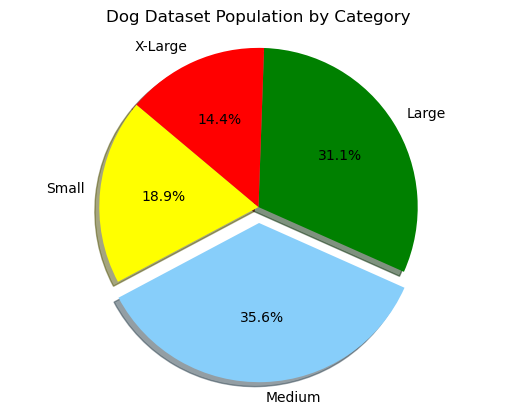

In [69]:
# Analysis of dog categories in sample set
dog_main_categories_groupby = dog_df.groupby(["Weight Category"])
dog_main_categories_groupby.count() ["Dog Name"]

# building a pie chart
dogs = ["Small", "Medium", "Large", "X-Large"]
dog_counts = [51,96,84,39]
colors = ["yellow","lightskyblue","green","red"]
explode = (0,0.1,0,0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(dog_counts, explode=explode, labels=dogs, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Dog Dataset Population by Category")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/Dogs-Category-PieChart.png")
plt.show()

In [29]:
#find the differences between size and barking
dog_groupby = dog_df.groupby(["Weight Category","Barking"])["Barking"].count()
dog_groupby


Weight Category  Barking
1-Small          1           4
                 2           2
                 3          19
                 4          19
                 5           7
2-Medium         0           1
                 1           7
                 2           7
                 3          50
                 4          18
                 5          13
3-Large          0           1
                 1          10
                 2           8
                 3          49
                 4          11
                 5           5
4-X-large        1          12
                 2           3
                 3          22
                 4           1
                 5           1
Name: Barking, dtype: int64

In [30]:
#find the differences between size and barking
dog_groupby = dog_df.groupby(["Weight Category"]).mean()["Barking"]
dog_groupby

Weight Category
1-Small      3.450980
2-Medium     3.208333
3-Large      2.880952
4-X-large    2.384615
Name: Barking, dtype: float64

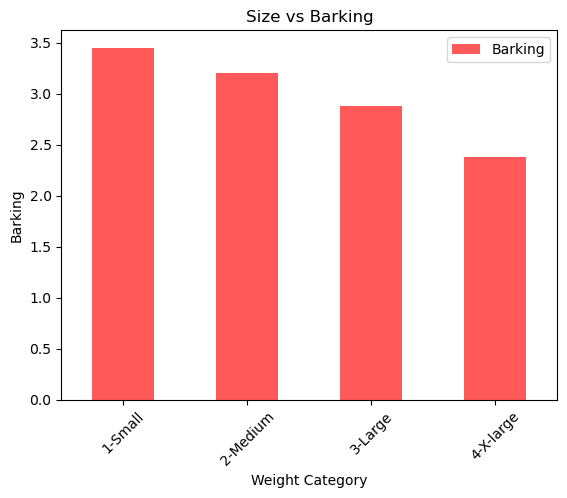

In [70]:
#graph for weight and barking - Do smaller dogs bark more?

dog_groupby.plot(kind="bar", ylabel = "Barking", title="Size vs Barking", facecolor="red", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsBarkingBarChart.png")

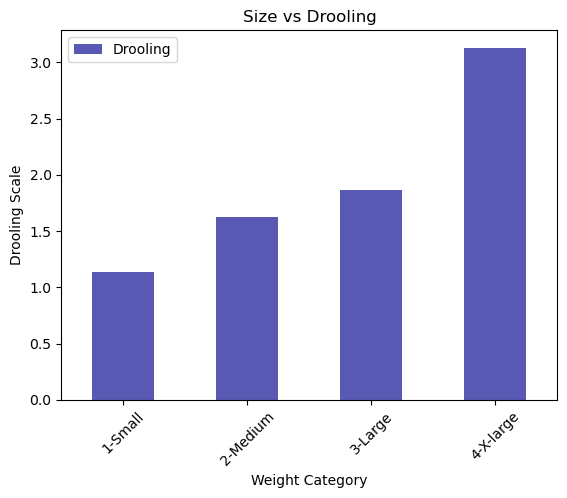

In [71]:
# Size vs Drooling - What kind of dog drools more?

#find the differences between size and drooling
dog_drool_cat_groupby = dog_df.groupby(["Weight Category"]).mean()["Drooling"]
dog_drool_cat_groupby

dog_drool_cat_groupby.plot(kind="bar", ylabel = "Drooling Scale", title="Size vs Drooling", facecolor="darkblue", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsDroolBarChart.png")

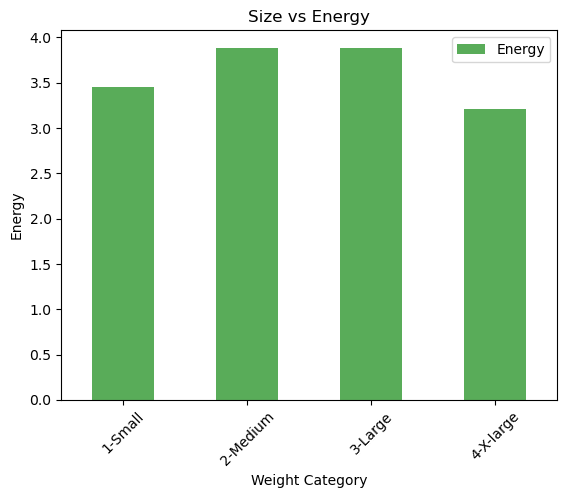

In [72]:
# Size vs Energy - Which dogs have more energy?

dog_energy_cat_groupby = dog_df.groupby(["Weight Category"]).mean()["Energy"]
dog_energy_cat_groupby

dog_energy_cat_groupby.plot(kind="bar", ylabel = "Energy", title="Size vs Energy", facecolor="green", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsEnergyBarChart.png")

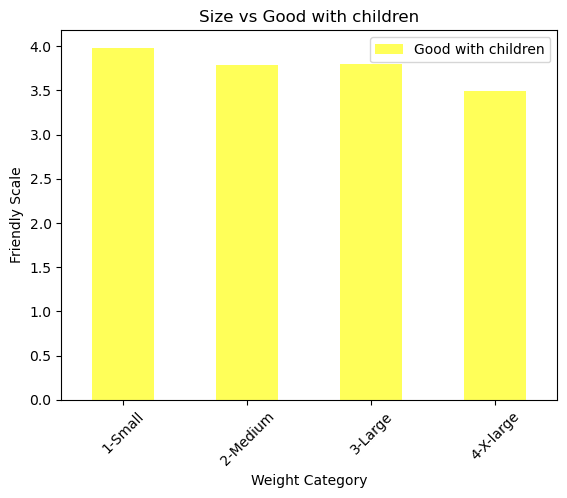

In [73]:
# Size vs Good with Children - Is there a dog category better for children? 

dog_children_cat_groupby = dog_df.groupby(["Weight Category"]).mean()["Good with children"]
dog_children_cat_groupby

dog_children_cat_groupby.plot(kind="bar", ylabel = "Friendly Scale", title="Size vs Good with children", facecolor="yellow", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsChildrenBarChart.png")

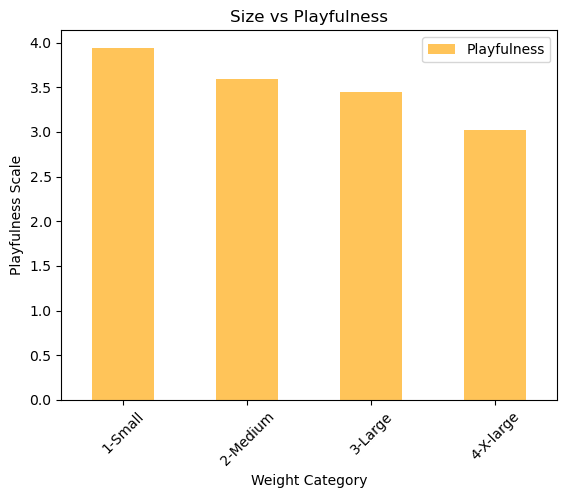

In [74]:
# Size vs Playfulness - Is there a dog category that is more playful? 

dog_playfulness_cat_groupby = dog_df.groupby(["Weight Category"]).mean()["Playfulness"]
dog_playfulness_cat_groupby

dog_playfulness_cat_groupby.plot(kind="bar", ylabel = "Playfulness Scale", title="Size vs Playfulness", facecolor="orange", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsPlayfulnessBarChart.png")

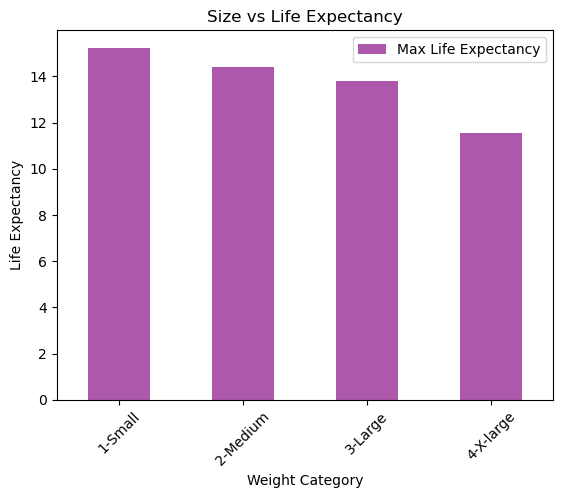

In [75]:
# Size vs Life Expectancy - Is there a dog category live the longest? 

dog_life_expectancy_cat_groupby = dog_df.groupby(["Weight Category"]).mean()["Max Life Expectancy"]
dog_life_expectancy_cat_groupby

dog_life_expectancy_cat_groupby.plot(kind="bar", ylabel = "Life Expectancy", title="Size vs Life Expectancy", facecolor="purple", alpha=0.65, rot=45, legend=True)

# Save the figure
plt.savefig("../Images/SizeVsLifeExpectancyBarChart.png")

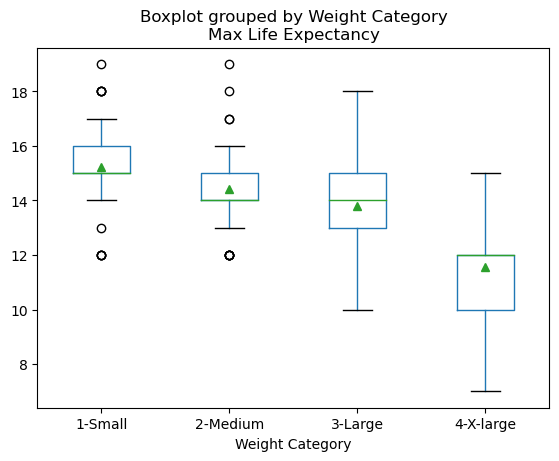

<Figure size 640x480 with 0 Axes>

In [76]:
# plot of all dogs and their life expectancy

#skewed in small dogs as there are more small and medium

dog_df.boxplot(by ='Weight Category', column =['Max Life Expectancy'], grid = False, showmeans=True)
plt.show()

# Save the figure
plt.savefig("../Images/Boxplot-WeightCat-LifeExpectancy.png")


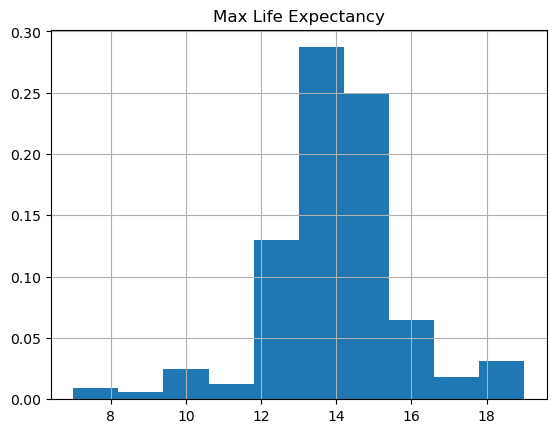

<Figure size 640x480 with 0 Axes>

In [77]:
#y axis is percentage

dog_df.hist(column ='Max Life Expectancy', density=True, sharey=True)
plt.show()

plt.savefig("../Images/Fig5.png")

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


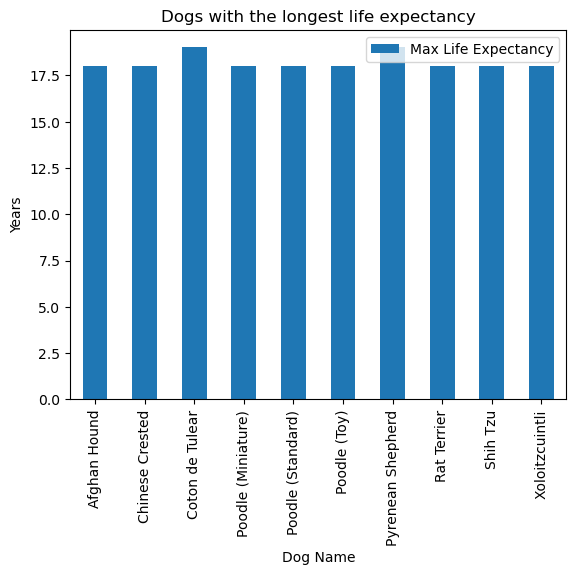

<Figure size 640x480 with 0 Axes>

In [35]:
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

# charting the dog max life expectancy

# creating ranking in descending order first based on Life Expectancy 
dog_df["Life Expectancy Ranking"] = dog_df["Max Life Expectancy"].rank(method='first', ascending=False)

# dogs_with_best_life_expectancy_df = dog_df.loc[dog_df["Max Life Expectancy"] >= 18]
dogs_with_best_life_expectancy_df = dog_df.loc[dog_df["Life Expectancy Ranking"] <= 10]

dogs_with_best_life_expectancy_df["Life Expectancy Extreme"] = "Longest"
# print(dogs_with_best_life_expectancy_df)

dogs_with_best_life_expectancy_df
dog_max_life_expectancy_df = dogs_with_best_life_expectancy_df[["Dog Name", "Max Life Expectancy", "Life Expectancy Extreme"]]
dog_max_life_expectancy_df = dog_max_life_expectancy_df.set_index("Dog Name")
dog_max_life_expectancy_df
dog_max_life_expectancy_df.plot(kind="bar", ylabel="Years")
plt.title("Dogs with the longest life expectancy")
plt.show()

# Save the figure
# plt.savefig("Fig2.png")

C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Enrique\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


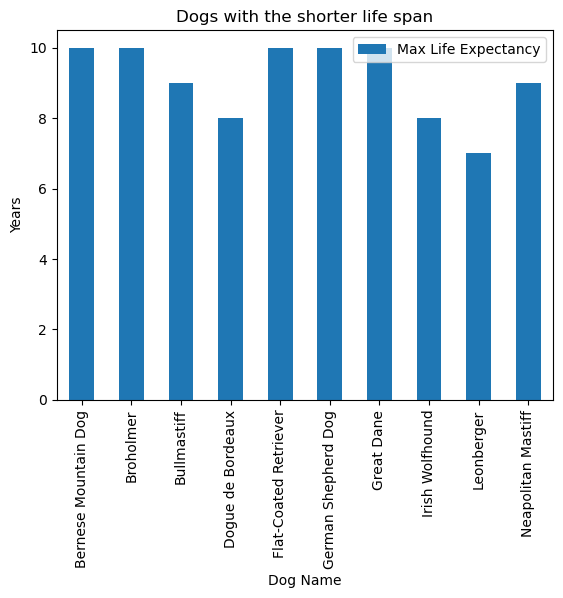

<Figure size 640x480 with 0 Axes>

In [36]:
#shorter life expectancy

# creating ranking in ascending order based on Life Expectancy field
dog_df["Life Expectancy Ranking"] = dog_df["Max Life Expectancy"].rank(method='first', ascending=True)

# dogs_with_worst_life_expectancy_df = dog_df.loc[dog_df["Max Life Expectancy"] <= 9]
dogs_with_worst_life_expectancy_df = dog_df.loc[dog_df["Life Expectancy Ranking"] <= 10]
dogs_with_worst_life_expectancy_df["Life Expectancy Extreme"] = "Shortest"
# print(dogs_with_worst_life_expectancy_df)

dog_lowest_life_expectancy_df = dogs_with_worst_life_expectancy_df[["Dog Name", "Max Life Expectancy","Life Expectancy Extreme"]]
dog_lowest_life_expectancy_df = dog_lowest_life_expectancy_df.set_index("Dog Name")
dog_lowest_life_expectancy_df
dog_lowest_life_expectancy_df.plot(kind="bar", ylabel="Years")
plt.title("Dogs with the shorter life span")

plt.show()

# Save the figure
# plt.savefig("Fig3.png")

In [37]:
# Concatenate and show overall life expectancy

best_and_worst_life_expectancy_df = pd.concat([dog_max_life_expectancy_df, dog_lowest_life_expectancy_df])
print(best_and_worst_life_expectancy_df)


                       Max Life Expectancy Life Expectancy Extreme
Dog Name                                                          
Afghan Hound                          18.0                 Longest
Chinese Crested                       18.0                 Longest
Coton de Tulear                       19.0                 Longest
Poodle (Miniature)                    18.0                 Longest
Poodle (Standard)                     18.0                 Longest
Poodle (Toy)                          18.0                 Longest
Pyrenean Shepherd                     19.0                 Longest
Rat Terrier                           18.0                 Longest
Shih Tzu                              18.0                 Longest
Xoloitzcuintli                        18.0                 Longest
Bernese Mountain Dog                  10.0                Shortest
Broholmer                             10.0                Shortest
Bullmastiff                            9.0                Shor

In [38]:
## Define function to label colors to use for bar chart
def define_colors(value):
	if value == "Longest":
		return "blue"
	elif (value == "Shortest"):
		return "red"

## Apply this new function using the pandas.map() function
best_and_worst_life_expectancy_df["Color Category"] = best_and_worst_life_expectancy_df["Life Expectancy Extreme"].map(define_colors)

best_and_worst_life_expectancy_df

,Max Life Expectancy,Life Expectancy Extreme,Color Category
Dog Name,,,
Afghan Hound,18.0,Longest,blue
Chinese Crested,18.0,Longest,blue
Coton de Tulear,19.0,Longest,blue
Poodle (Miniature),18.0,Longest,blue
Poodle (Standard),18.0,Longest,blue
Poodle (Toy),18.0,Longest,blue
Pyrenean Shepherd,19.0,Longest,blue
Rat Terrier,18.0,Longest,blue
Shih Tzu,18.0,Longest,blue


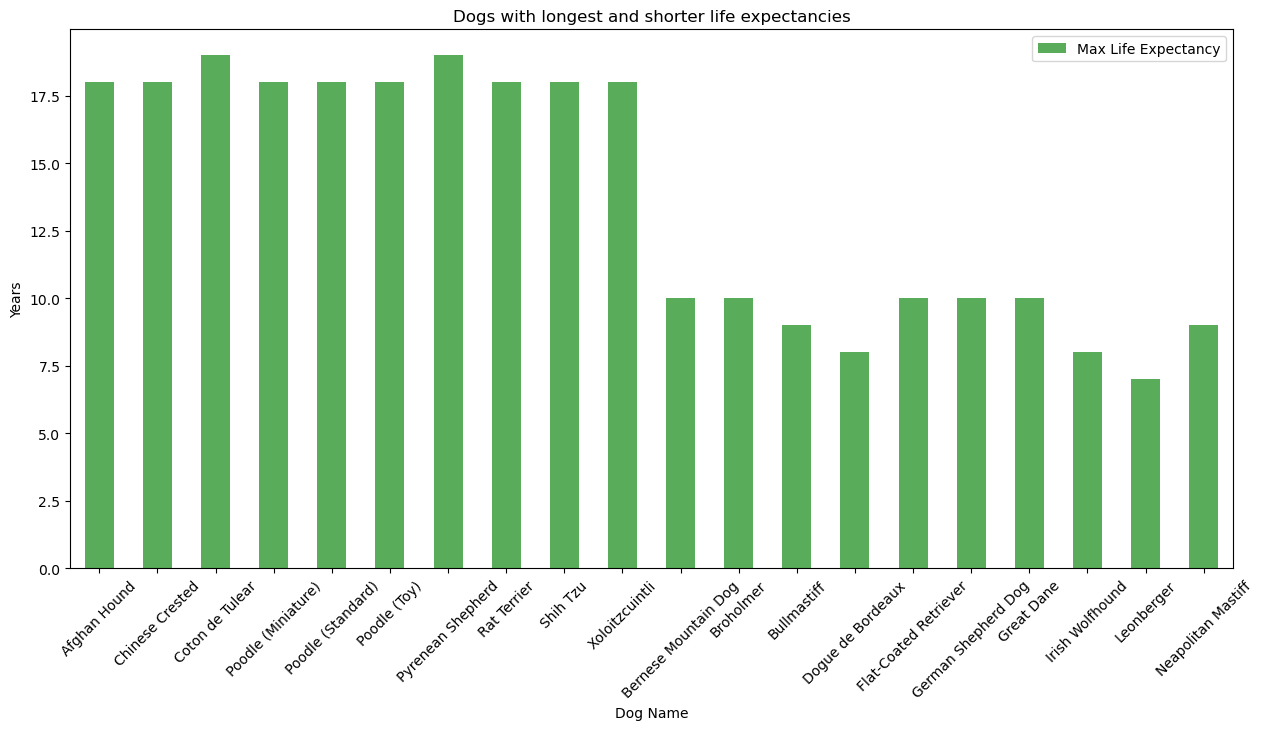

<Figure size 640x480 with 0 Axes>

In [88]:
colors = {'Longest' : 'green', 'Shortest': 'red'}

best_and_worst_life_expectancy_df.plot(kind="bar", ylabel="Years", 
            color="green", 
            figsize=(15,7), alpha=0.65, rot=45, legend=True)

plt.title("Dogs with longest and shorter life expectancies")

# out: color=[colors[i] for i in best_and_worst_life_expectancy_df["Life Expectancy Extreme"] ]
# out:  color=best_and_worst_life_expectancy_df["Color Category"]

plt.show()

# save figure
plt.savefig("../Images/Dogs-With-Best-and-Worst-Life-Expectancy.png")

In [42]:
# TESTING: playing with sorting

# sorting dataframe to see results of max and min life expectancies after ranking
final_sort_df = best_and_worst_life_expectancy_df.sort_values("Max Life Expectancy")
final_sort_df

,Max Life Expectancy,Life Expectancy Extreme,Color Category
Dog Name,,,
Leonberger,7.0,Shortest,red
Irish Wolfhound,8.0,Shortest,red
Dogue de Bordeaux,8.0,Shortest,red
Neapolitan Mastiff,9.0,Shortest,red
Bullmastiff,9.0,Shortest,red
Great Dane,10.0,Shortest,red
German Shepherd Dog,10.0,Shortest,red
Flat-Coated Retriever,10.0,Shortest,red
Broholmer,10.0,Shortest,red


The r-value is: -0.5861574035667956


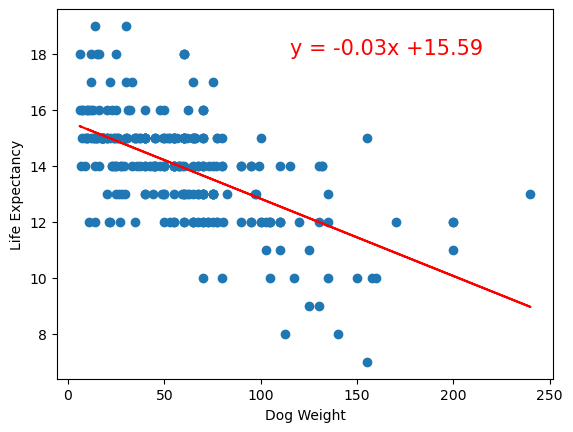

<Figure size 640x480 with 0 Axes>

In [79]:
##### compare life expectancy vs dog weight
x_series = dog_df["Avg Max Weight"]
y_series = dog_df["Max Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# Create Plot
plt.scatter(x_series,y_series)
plt.plot(x_series,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Dog Weight')
plt.ylabel('Life Expectancy')
plt.annotate(line_eq,(115,18),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

# Save the figure
plt.savefig("../Images/Fig4.png")

The r-value is: -0.49738498123836933


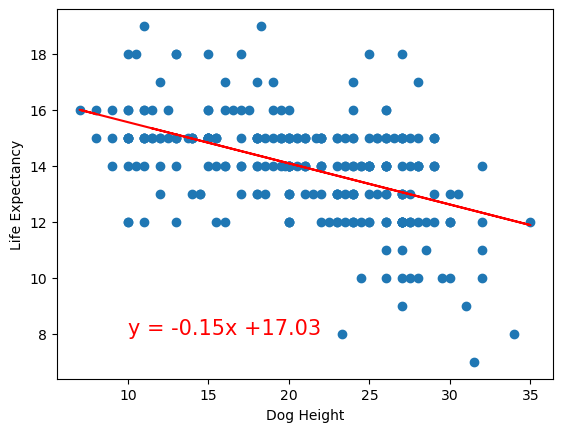

<Figure size 640x480 with 0 Axes>

In [80]:
##### compare life expectancy vs dog weight
x_series = dog_df["Avg Max Height"]
y_series = dog_df["Max Life Expectancy"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# Create Plot
plt.scatter(x_series,y_series)
plt.plot(x_series,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Dog Height')
plt.ylabel('Life Expectancy')
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

# Save the figure
plt.savefig("../Images/HeightVsLifeExpectancy.png")

The r-value is: -0.04438630922996022


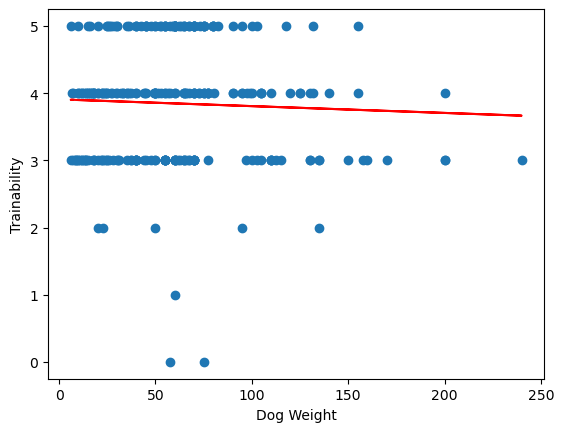

<Figure size 640x480 with 0 Axes>

In [81]:
##### compare Trainability vs dog weight
x_series = dog_df["Avg Max Weight"]
y_series = dog_df["Trainability"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# Create Plot
plt.scatter(x_series,y_series)
plt.plot(x_series,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Dog Weight')
plt.ylabel('Trainability')
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

# Save the figure
plt.savefig("../Images/TrainabilityVsSize.png")

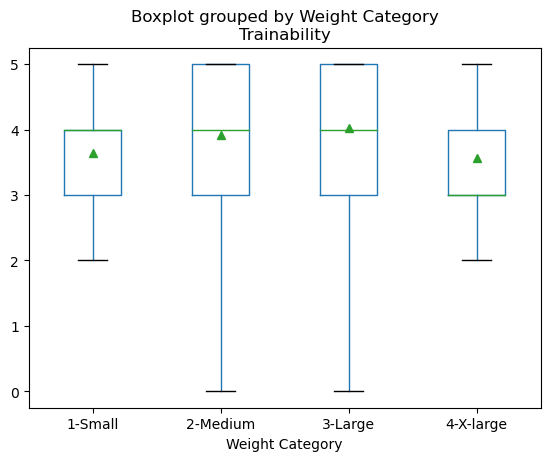

<Figure size 640x480 with 0 Axes>

In [82]:
# plot of all dogs and their trainability

#skewed in small dogs as there are more small and medium

dog_df.boxplot(by ='Weight Category', column =['Trainability'], grid = False, showmeans=True)
plt.show()

# Save the figure
plt.savefig("../Images/BoxPlot_Trainability.png")

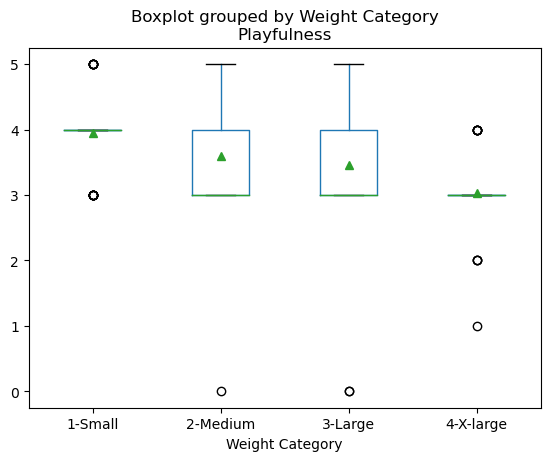

<Figure size 640x480 with 0 Axes>

In [83]:
# plot of all dogs and their playfulness

dog_df.boxplot(by ='Weight Category', column =['Playfulness'], grid = False, showmeans=True)
plt.show()

# Save the figure
plt.savefig("../Images/BoxPlot_Playfulness.png")

The r-value is: -0.34388481288606304


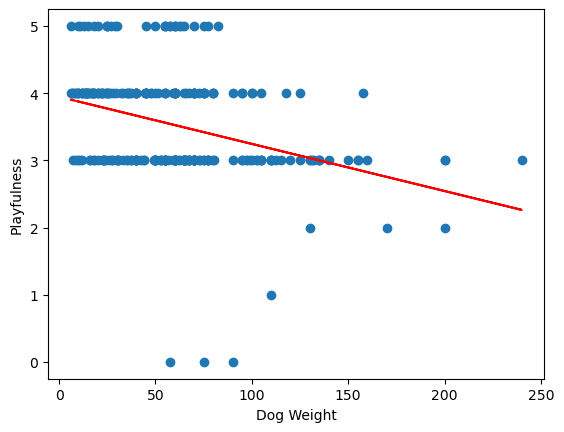

<Figure size 640x480 with 0 Axes>

In [84]:
##### compare Playfulness vs dog weight
x_series = dog_df["Avg Max Weight"]
y_series = dog_df["Playfulness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_series, y_series)
# Get regression values
regress_values = x_series * slope + intercept
# print(regress_values)
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# Create Plot
plt.scatter(x_series,y_series)
plt.plot(x_series,regress_values,"r-")
# Label plot and annotate the line equation
plt.xlabel('Dog Weight')
plt.ylabel('Playfulness')
plt.annotate(line_eq,(10,8),fontsize=15,color="red")
# Print r value
print(f"The r-value is: {rvalue}")
# Show plot
plt.show()

# Save the figure
plt.savefig("../Images/PlayfulnessVsSize.png")

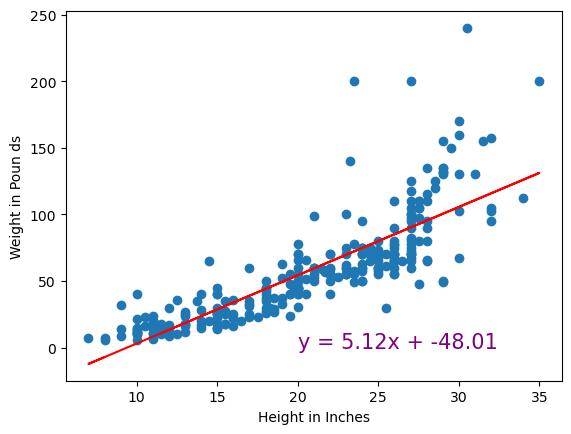

The r-value is: 0.6643584424567911


<Figure size 640x480 with 0 Axes>

In [85]:
x_values = dog_df['Avg Max Height']
y_values = dog_df['Avg Max Weight']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="purple")
plt.xlabel('Height in Inches')
plt.ylabel('Weight in Poun ds')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/Fig7.png")

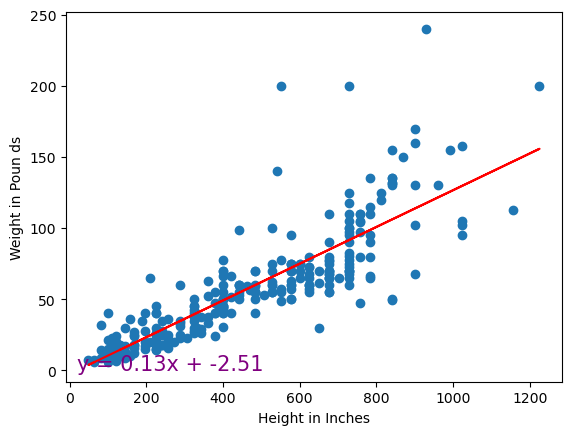

The r-value is: 0.6980433579318633


<Figure size 640x480 with 0 Axes>

In [86]:
# calculate linear regression for dogs height and weight

x_values = dog_df['Avg Max Height']**2
y_values = dog_df['Avg Max Weight']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="purple")
plt.xlabel('Height in Inches')
plt.ylabel('Weight in Poun ds')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/Fig8.png")

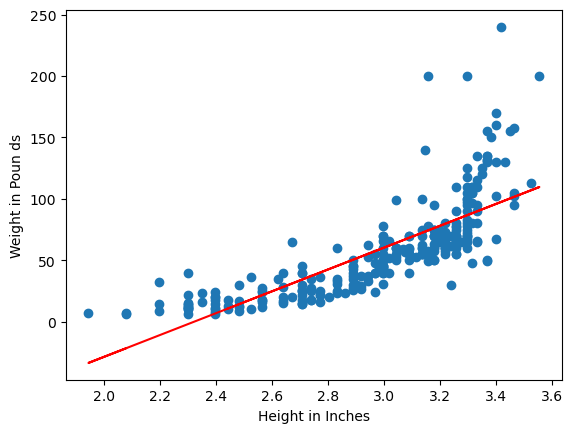

The r-value is: 0.5963339632370537


<Figure size 640x480 with 0 Axes>

In [87]:
x_values = np.log(dog_df['Avg Max Height'])
y_values = dog_df['Avg Max Weight']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="purple")
plt.xlabel('Height in Inches')
plt.ylabel('Weight in Poun ds')
plt.show()
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("../Images/Fig9.png")